# Pandas and miscellaneous odds and ends

In [137]:
def get_nums(msg:str="", qty:int=1, marker:str=None, lowest:int=None, highest:int=None):
    """return list of numbers meeting requirements
    msg: prompt message
    qty: number of numbers required
    marker: text entered to signal end of entries
    lowest: lowest acceptable value
    highest: highest acceptable value"""
    
    nums = []
    while marker is not None or (marker is None and len(nums) < qty):
        response = input(msg)
        if response == marker:
            if len(nums) >= qty:
                break
            else:
                print('Minimum number of entries not reached yet')
        else:
            try:
                num = int(response)
                if (lowest and num < lowest) or (highest and num > highest):
                    raise ValueError
                nums.append(num)
            except ValueError:
                print('not great, try again ...')
    return nums

In [ ]:
from io import StringIO
import csv

data = """Chicago IL,Sale,"$649,000",1 Residential Lot,23:07 PM 01/10/20.11 AC Lot"""

with StringIO(data) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        print(row)

test = """name,department,birthday month
John Smith,Accounting,November
Erica Meyers,IT,March"""

with StringIO(test) as testing, open('employee_birthday.txt', 'w') as employee:
    for row in testing:
        employee.write(row)

# Example pandas stuff

In [ ]:
import pandas as pd

df = pd.read_csv('IndianaSALARIES.csv')
df.set_index('Name', inplace=True)
df.head()

Convert string numeric colums with currency and thousands separator to numeric

you can replace currency and thousands seperator explicitly

In [ ]:
df['pay'] = df['Base Pay'].str.replace(',', '')
df['pay'] = df['pay'].str.replace('$', '')
df['pay'] = df['pay'].astype(int)
df

or replace currency and thousands on named columns using one dictionary expression

In [ ]:
df['pay_amount'] = df['Base Pay']  # just so I leave original formatted strings in place
cols = ['pay_amount']  # list of column names
df[cols] = df[cols].replace({'£': '', '\$': '', ',': ''}, regex=True)
df

In [ ]:
df[['Base Pay', 'University or Office', 'Position']][df.pay > 200000]

# alternative input / menu library

In [ ]:
import pyinputplus as pyip
import re

In [ ]:
pyip.inputStr('Favorite animal: ', blockRegexes=['dog', 'cat'],timeout=5)

# Extracting data from a paginated reports

In [ ]:
from io import StringIO  # just for this example, using sample
from pprint import pprint  # pretty printing

sample = """05/02/20            report store - (123) Store location                           
09:50:25                                                                                                       Page 1

COlumn 1             Column 2     Column 3             Column 4                    
------------------ ------------ --------------------- ---------------- 
Data                 Data         Data                 Data
Fred                 Barry        Kevin                Sandra
Sarah                Wendy        Barb                 Steve

05/02/20            report store - (123) Store location                           
09:50:25                                                                                                     Page 2

COlumn 1             Column 2     Column 3             Column 4                    
------------------ ------------ --------------------- ---------------- 
Data                 Data         Data                 Data
Brian                Simon        Helen               Carl
"""


data = []
readingdata = False
with StringIO(sample) as data_file:
    for line in data_file:
        if line.lower().startswith('column 1'):
            readingdata = True
        elif not line.strip():  # you've reached a blank line
            readingdata = False
        elif readingdata and not line.startswith('-----'):
            data.append(line.strip().split())
pprint(data)

In [ ]:
import re

html = """
05/02/20            report store - (123) Store location                           
09:50:25                                                                                                       Page 1

COlumn_1             Column_2     Column_3             Column_4                    
------------------ ------------ --------------------- ---------------- 
Data                 Data         Data                 Data
Fred                 Barry        Kevin                Sandra
Sarah                Wendy        Barb                 Steve

05/02/20            report store - (123) Store location                           
09:50:25                                                                                                     Page 2

COlumn_1             Column_2     Column_3             Column_4                    
------------------ ------------ --------------------- ---------------- 
Data                 Data         Data                 Data
Brian                Simon        Helen               Carl
"""

pattern = re.compile(r'^\d\d/\d\d/\d\d')
information = []
for i, line in enumerate(html.split('\n')):
    if pattern.match(line):
        date    = pattern.match(line).group()
        headers = html.split('\n')[i + 3].split()
        data    = html.split('\n')[i + 5].split()
        information.append({date: dict(zip(headers, data))})

print(information)

# Terminal User Interface - press a key

In [ ]:
# will not work in this notebook

from blessed import Terminal

term = Terminal()

print(f"{term.home}{term.black_on_skyblue}{term.clear}")
print("press 'q' to quit.")
with term.cbreak():
    val = ''
    while val.lower() != 'q':
        val = term.inkey(timeout=3)
        if not val:
           print("It sure is quiet in here ...")
        elif val.is_sequence:
           print("got sequence: {0}.".format((str(val), val.name, val.code)))
        elif val:
           print("got {0}.".format(val))
    print(f'bye!{term.normal}')

# web scrapping data table and analysing with pandas

In [116]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

headers = {'User-Agent': 'Mozilla/5.0'}
html = requests.get('https://www.basketball-reference.com/leagues/NBA_2020_games-february.html', headers=headers)
soup = BeautifulSoup(html.content, 'html.parser')

data_table = soup.find("table", {"id":"schedule"})
df = pd.read_html(str(data_table))[0]
sc_games =  df["Home/Neutral"]=='Sacramento Kings'
sc_df = df[sc_games]
sc_df

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Notes
8,"Sat, Feb 1, 2020",10:00p,Los Angeles Lakers,129.0,Sacramento Kings,113.0,Box Score,NaN,17583.0,NaN
22,"Mon, Feb 3, 2020",10:00p,Minnesota Timberwolves,109.0,Sacramento Kings,113.0,Box Score,NaN,15819.0,NaN
48,"Fri, Feb 7, 2020",10:00p,Miami Heat,97.0,Sacramento Kings,105.0,Box Score,NaN,16760.0,NaN
58,"Sat, Feb 8, 2020",10:00p,San Antonio Spurs,NaN,Sacramento Kings,NaN,NaN,NaN,NaN,NaN
97,"Thu, Feb 20, 2020",10:00p,Memphis Grizzlies,NaN,Sacramento Kings,NaN,NaN,NaN,NaN,NaN


In [119]:
df['Visitor/Neutral'].value_counts()

Miami Heat                8
San Antonio Spurs         8
Brooklyn Nets             8
Dallas Mavericks          7
Boston Celtics            7
Memphis Grizzlies         7
Minnesota Timberwolves    7
New York Knicks           7
Phoenix Suns              7
Charlotte Hornets         7
Detroit Pistons           6
Orlando Magic             6
Portland Trail Blazers    6
Milwaukee Bucks           6
Atlanta Hawks             6
New Orleans Pelicans      6
Sacramento Kings          6
Los Angeles Lakers        5
Philadelphia 76ers        5
Golden State Warriors     5
Houston Rockets           5
Los Angeles Clippers      5
Denver Nuggets            5
Cleveland Cavaliers       4
Indiana Pacers            4
Chicago Bulls             4
Oklahoma City Thunder     3
Washington Wizards        3
Utah Jazz                 3
Toronto Raptors           2
Name: Visitor/Neutral, dtype: int64

# example of analysis of USA salary data

from https://towardsdatascience.com/tips-and-tricks-for-fast-data-analysis-in-python-f108ad32fa90

In [109]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

column_names = ['age', 'State-gov', 'fnlwgt', 'education', 'educational-num',
                'marital-status', 'occupation', 'relationship', 'race', 'gender',
                'capital-gain', 'capital-loss', 'hours-per-week','native-country',
                'income']

# source = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv('adult_data.csv', names=column_names)
data.head()

,age,State-gov,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [110]:
data['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [111]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


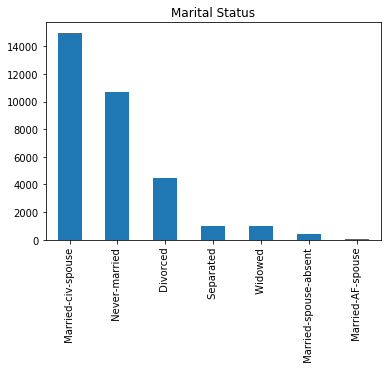

In [120]:
plt.title('Marital Status')
data['marital-status'].value_counts().plot.bar()

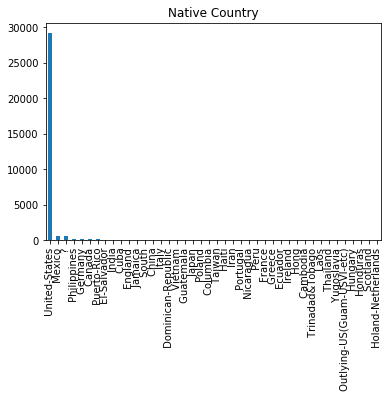

In [133]:
plt.title('Native Country')
data['native-country'].value_counts().plot.bar()

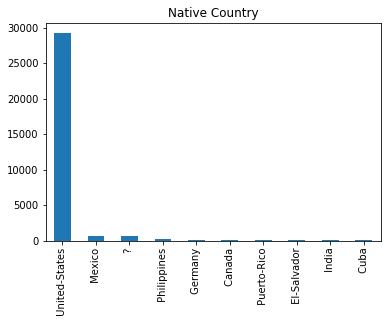

In [134]:
plt.title('Native Country')
data['native-country'].value_counts().nlargest(10).plot.bar()

In [135]:
round(data.groupby(['income']).mean(),2)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
income,,,,,,
<=50K,36.78,190340.87,9.60,148.75,53.14,38.84
>50K,44.25,188005.00,11.61,4006.14,195.00,45.47


 <=50K         AxesSubplot(0.1,0.15;0.363636x0.75)
 >50K     AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

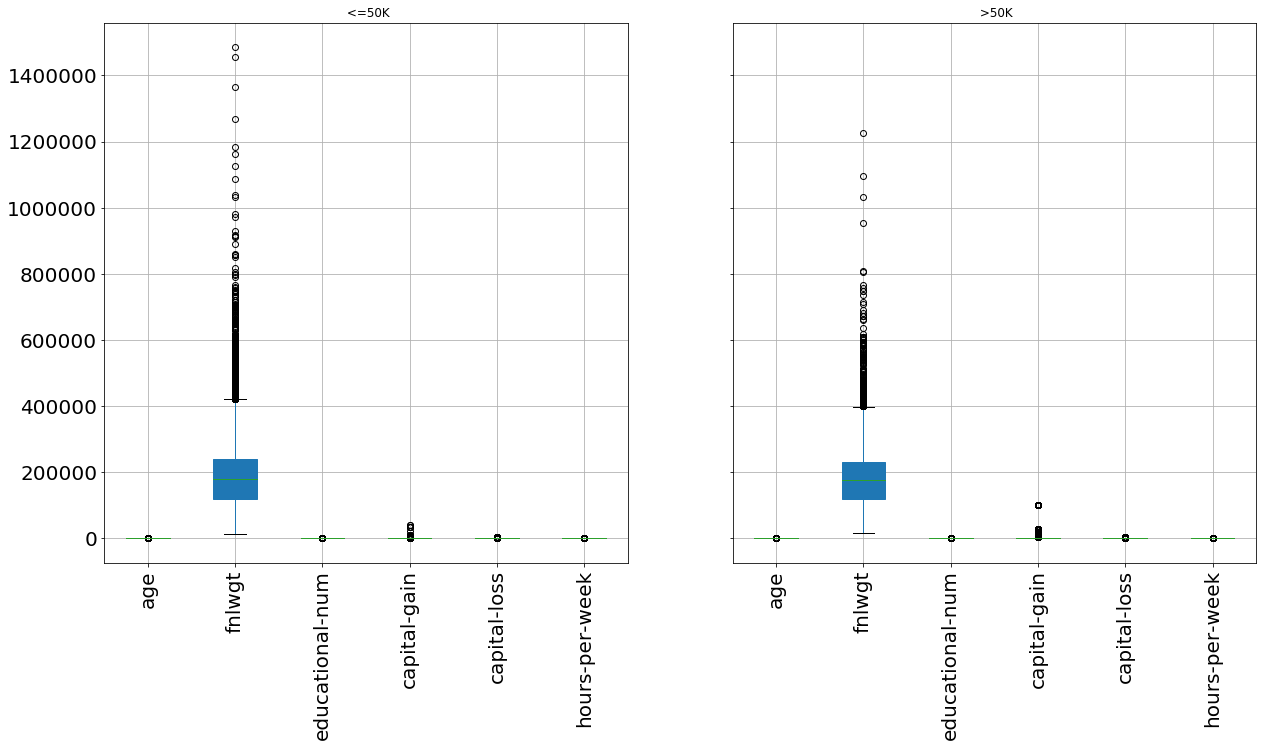

In [136]:
data.groupby('income').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)

# reddit challenge - make code shorter

I suggested using Pandas

https://www.reddit.com/r/learnpython/comments/f165rn/is_there_a_shorter_way_to_write_this_code/

In [2]:
import pandas as pd

def total_in_hand(currency, amount_in_hand):
    if currency in CURRENCIES:
        total = pd.concat([pd.Series(CURRENCIES[currency]), pd.Series(amount_in_hand)], axis=1, join="inner")
        return (total[0] * total[1]).sum()

CURRENCIES = {"USD": {
                "penny": .01, "nickel": .05, "dime": .10, "quarter": .25,
                "one_dollar": 1.0, "two_dollar": 2.0, "five_dollar": 5.0,
                "ten_dollar": 10.0, "twenty_dollar": 20.0, "fifty_dollar": 50.0,
                "hundred_dollar":100.0,
                }
             }

cash_in_my_pocket = ({"penny": 30, "nickel": 25, "dime": 20, "quarter": 40,
                "one_dollar": 4, "two_dollar": 1, "five_dollar": 20, 
                "ten_dollar": 7,  "twenty_dollar": 1, "fifty_dollar": 2, 
                "hundred_dollar": 3,},
                     {"one_dollar":30000, "fifty_dollar": 2, 
                "hundred_dollar": 3,},
                    )

for amount_to_hand in cash_in_my_pocket:
    total = total_in_hand('USD', amount_to_hand)
    print(f'Total value in hand is: ${total:.2f}')
        
total = total_in_hand('USDD', amount_to_hand)
if total:
    print(f'Total value in hand is: ${total:.2f}')
else:
    print('Unknown currency')

Total value in hand is: $609.55
Total value in hand is: $30400.00
Unknown currency


In [7]:
    import time
    import sys

    text = '''This is a line of characters that I would like to running word by word'''

    for letter in text:
        print(letter, end='')
        sys.stdout.flush()
        time.sleep(.1)
    print()

This is a line of characters that I would like to running word by word


In [45]:
from io import StringIO
import pandas as pd
import numpy as np

data = "5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,186,253,253,150,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,93,252,253"
data = data + "\n"
data = data * 10

filename = StringIO(data)

df = pd.read_csv(filename, header=None, dtype=np.float64)
df2 = df.div(255)
df2

,0,1,2,3,4,5,6,7,8,9,...,458,459,460,461,462,463,464,465,466,467
0,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.062745,0.364706,0.988235,0.992157
1,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.062745,0.364706,0.988235,0.992157
2,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.062745,0.364706,0.988235,0.992157
3,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.062745,0.364706,0.988235,0.992157
4,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.062745,0.364706,0.988235,0.992157
5,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.062745,0.364706,0.988235,0.992157
6,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.062745,0.364706,0.988235,0.992157
7,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.062745,0.364706,0.988235,0.992157
8,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.062745,0.364706,0.988235,0.992157
9,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.062745,0.364706,0.988235,0.992157


In [22]:
data

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [41]:
Senators = {
         'bernie sanders':{
                 'party':'independent',
                 'ideology':'progressive',
                 'state':'vermont',
                 'start year':2007,
                 'trial vote':'convict'
          },
         'lamar alexander':{
                  'party':'republican', 
                  'ideology' :'conservative', 
                  'state':'tennessee', 
                  'start year':2003,
                  'trial vote':'acquit' 
          }
}
    
    for senator, info in Senators.items():
        print(senator)
        for item, detail in info.items():
            print(f'{item:10} {detail}')

bernie sanders
party      independent
ideology   progressive
state      vermont
start year 2007
trial vote convict
lamar alexander
party      republican
ideology   conservative
state      tennessee
start year 2003
trial vote acquit


In [42]:
Senators['bernie sanders']['party']

'independent'

In [53]:
    def display_menu():

        def display_sub_menu(menu):
            for x in menu:
                prices = f'${menu[x]}'
                print(f' {x} {prices:>14}')

        print('Menu'.rjust(22))
        print('-' * 44)
        print((' ' * 11) + ('*' * 7) + 'Coffee' + ('*' * 7))
        display_sub_menu(foodMenu)
        print((' ' * 7) + ('*' * 7) + 'All Day Breakfast' + ('*' * 7))
        display_sub_menu(drinksMenu)
        print()

    def affirmation(prompt):
        while True:
            response = input(prompt)
            if response in affirmative:
                return True
            if response in negative:
                return False
            print('Sorry. Don\'t understand.')

    def available(menu):
        while True:
            choice = input('What can I get you? ')
            if choice:
                if not choice in menu:
                    print('I am sorry, we do not have that available')
                return choice, menu.get(choice, 0)
            print('Sorry?')


    AFFIRMATIVE = {'Yes', 'yes', 'Sure', 'sure', 'Yeah', 'yeah'
                   'Why not', 'why not', 'Absolutely', 'absolutely'}
    NEGATIVE = {'No', 'no', 'No thank you', 'no thank you', 'Not today', 'not today',
                'Maybe another time', 'maybe another time', 'Maybe tomorrow', 'maybe tomorrow'}

    drinksMenu = {
        'Caffe Latte': 3.65,
        'White Mocha': 4.45,
    }
    foodMenu = {
        'Butter Croissant   ': 2.45,
        'Chocolate Croissant': 2.75
    }

    menus = {
        'drinks': ('Do you want to have a drink today? ', drinksMenu),
        'food': ('Do you want to eat something? ', foodMenu),
            }

    order = []
    total = 0

    display_menu()
    print('Good morning! ', end="")
    for menu_name, (prompt, menu) in menus.items():
        if affirmation(prompt):
            choice, price = available(menu)
            if choice:
                order.append(choice)
                total += price
    print(f"You've ordered {', '.join(order)}")
    print(f'Your total is ${total}')

                  Menu
--------------------------------------------
           *******Coffee*******
 Butter Croissant             $2.45
 Chocolate Croissant          $2.75
       *******All Day Breakfast*******
 Caffe Latte          $3.65
 White Mocha          $4.45

Good morning! 

Do you want to have a drink today?  yes
What can I get you?  Caffe Latte
Do you want to eat something?  yes
What can I get you?  Chocolate Croissant


You've ordered Caffe Latte, Chocolate Croissant
Your total is $6.4


In [55]:
a = [2, 4, 3, 10, 33]
Total = sum(a)
Count = len(a)
Average = Total/Count
Avg20 = Average * 0.20
print("Average of given list : ",round(Average,2))
print("Array Numbers that are higher than Average by 20% are : ")
for num in a:
    if num > Avg20:
        print(num, end=' ')

Average of given list :  10.4
Array Numbers that are higher than Average by 20% are : 
4 3 10 33 

In [56]:
.20*10.4

2.08

# filtering to find consecutive dates
https://stackanswers.net/questions/find-group-of-consecutive-dates-in-pandas-dataframe

In [176]:
import numpy as np
import pandas as pd
from numpy import array
import datetime

df = pd.Series(array([datetime.date(2019, 10, 22), datetime.date(2019, 10, 25),
   datetime.date(2019, 10, 26), datetime.date(2019, 10, 28),
   datetime.date(2019, 10, 30), datetime.date(2019, 11, 2),
   datetime.date(2019, 11, 6), datetime.date(2019, 11, 8),
   datetime.date(2019, 11, 10), datetime.date(2019, 11, 11),
   datetime.date(2019, 11, 13), datetime.date(2019, 11, 16),
   datetime.date(2019, 11, 18), datetime.date(2019, 11, 20),
   datetime.date(2019, 11, 23), datetime.date(2019, 11, 25),
   datetime.date(2019, 11, 27), datetime.date(2019, 11, 29),
   datetime.date(2019, 12, 1), datetime.date(2019, 12, 3),
   datetime.date(2019, 12, 5), datetime.date(2019, 12, 8),
   datetime.date(2019, 12, 9), datetime.date(2019, 12, 11),
   datetime.date(2019, 12, 14), datetime.date(2019, 12, 16),
   datetime.date(2019, 12, 18), datetime.date(2019, 12, 20),
   datetime.date(2019, 12, 22), datetime.date(2019, 12, 23),
   datetime.date(2019, 12, 25), datetime.date(2019, 12, 28),
   datetime.date(2019, 12, 29), datetime.date(2019, 12, 31),
   datetime.date(2020, 1, 2), datetime.date(2020, 1, 4),
   datetime.date(2020, 1, 7), datetime.date(2020, 1, 8),
   datetime.date(2020, 1, 12), datetime.date(2020, 1, 15),
   datetime.date(2020, 1, 17), datetime.date(2020, 1, 18),
   datetime.date(2020, 1, 20)], dtype=object))
day = pd.Timedelta('1d')
consecs = ((df - df.shift(-1)).abs() == day) | (df.diff() == day)
print(df[consecs])

1     2019-10-25
2     2019-10-26
8     2019-11-10
9     2019-11-11
21    2019-12-08
22    2019-12-09
28    2019-12-22
29    2019-12-23
31    2019-12-28
32    2019-12-29
36    2020-01-07
37    2020-01-08
40    2020-01-17
41    2020-01-18
dtype: object


## pandas logical or |


In [78]:
np.random.seed(0)
df = pd.DataFrame(np.random.choice(10, (5, 3)), columns=list('ABC'))
df

,A,B,C
0,5,0,3
1,3,7,9
2,3,5,2
3,4,7,6
4,8,8,1


In [79]:
df['A'] == 3

0    False
1     True
2     True
3    False
4    False
Name: A, dtype: bool

In [80]:
df['B'] == 7

0    False
1     True
2    False
3     True
4    False
Name: B, dtype: bool

In [81]:
(df['A'] == 3) | (df['B'] == 7)

0    False
1     True
2     True
3     True
4    False
dtype: bool

In [82]:
df[(df['A'] == 3) | (df['B'] == 7)]

,A,B,C
1,3,7,9
2,3,5,2
3,4,7,6


In [83]:
df.diff()

,A,B,C
0,NaN,NaN,NaN
1,-2.0,7.0,6.0
2,0.0,-2.0,-7.0
3,1.0,2.0,4.0
4,4.0,1.0,-5.0


In [84]:
df

,A,B,C
0,5,0,3
1,3,7,9
2,3,5,2
3,4,7,6
4,8,8,1


In [88]:
(df - df.shift(-1)).abs()  # misses last row comparison

,A,B,C
0,2.0,7.0,6.0
1,0.0,2.0,7.0
2,1.0,2.0,4.0
3,4.0,1.0,5.0
4,NaN,NaN,NaN


In [90]:
df.diff().abs()  # misses first row comparison

,A,B,C
0,NaN,NaN,NaN
1,2.0,7.0,6.0
2,0.0,2.0,7.0
3,1.0,2.0,4.0
4,4.0,1.0,5.0


# split a column into multiple columns using split for one or more spaces

In [189]:
from io import StringIO
import pandas as pd

def func(cell):
    return cell.split()

sample = """2020-01-01 111 dt=7389
2020-01-02    1112323   dt=32123
2020-01-03     1112324  dt=32125
"""

df = pd.read_csv(StringIO(sample), names=['test'])
df[['Col x', 'Col y', 'Col z']] = df['test'].str.split(' +', expand=True)
df

,test,Col x,Col y,Col z
0,2020-01-01 111 dt=7389,2020-01-01,111,dt=7389
1,2020-01-02 1112323 dt=32123,2020-01-02,1112323,dt=32123
2,2020-01-03 1112324 dt=32125,2020-01-03,1112324,dt=32125
